<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://cocl.us/corsera_da0101en_notebook_top">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/TopAd.png" width="750" align="center">
    </a>
</div>

<h1 align=center><font size=5>Data Science and Machine Learning Capstone Project</font></h1>

<h1>New Yorker Bronx PLUTO Data Wrangling</h1>

<h4>Import pandas</h4> 

In [1]:
import pandas as pd
import matplotlib.pylab as plt

<h2>Reading the data set from Computer storage folder.</h2>

In [2]:
filename = 'E:\\1.IPCOS BACKUP\\3. MMR_PSNL\\2020 Data Science and Analytics Courses\\3. Python Data Science Certificate\\5. Data Science and Machine Learning Capstone Project\\PLUTO_for_WEB\\BX_18v1.csv'

Use the Pandas method <b>read_csv()</b> to load the data from local drive.

In [3]:
#df = pd.read_csv(filename, names = headers)
df = pd.read_csv(filename)
print(df.shape)
#df.size
df.head(10)

C:\Users\TOPU\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(89854, 87)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.000000e+00,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.000000e+00,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.000000e+00,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.000000e+00,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.000000e+00,NaN,1,NaN,NaN,18V1
5,BX,2260,19,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,2.022600e+09,12/31/1990,1,NaN,NaN,18V1
6,BX,2260,34,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.000000e+00,NaN,1,NaN,NaN,18V1
7,BX,2260,38,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.000000e+00,NaN,1,NaN,NaN,18V1
8,BX,2260,52,201,19.0,NaN,7.0,8.0,10454.0,NaN,...,NaN,NaN,NaN,NaN,0.000000e+00,NaN,2,NaN,NaN,18V1
9,BX,2260,62,201,19.0,NaN,7.0,8.0,10454.0,NaN,...,Y,209S016,20901.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1


<b>Check data Types and Cardinality</b>

In [13]:
df.apply(pd.Series.nunique)

Borough            1
Block           3032
Lot             1960
CD                17
CT2010           339
                ... 
APPDate         1672
PLUTOMapID         4
FIRM07_FLAG        1
PFIRM15_FLAG       1
Version            1
Length: 87, dtype: int64

Create Dataframe with necessary columns and save it for meging with 311 System Data
Columns are:Address, BldgArea, BldgDepth, BuiltFAR, CommFAR,
FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeceArea, ResArea, ResidFAR,
RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, and XCoord.

In [14]:
#df.columns
df_Bx_PLUTO=df[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR','FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR',
'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]
df_Bx_PLUTO.sort_values(by=['YearBuilt'])
df_Bx_PLUTO.head(10)
#df_Bx_PLUTO.apply(pd.Series.nunique)
df_Bx_PLUTO.to_csv("Bx_PLUTO.csv", index=True)

Identify_missing_values

<h4>Evaluating for Missing Data</h4>

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [18]:
missing_data = df.isnull()
missing_data.head(10)

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


<b>"True" stands for missing value</b>, while "False" stands for not missing value.

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>

In [19]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 
#for i in missing_data.columns.values.tolist():
    #print(i)
    #print (missing_data[i].value_counts())
    #print("")

Borough
False    324583
Name: Borough, dtype: int64

Block
False    324583
Name: Block, dtype: int64

Lot
False    324583
Name: Lot, dtype: int64

CD
False    324583
Name: CD, dtype: int64

CT2010
False    323326
True       1257
Name: CT2010, dtype: int64

CB2010
False    316965
True       7618
Name: CB2010, dtype: int64

SchoolDist
False    323675
True        908
Name: SchoolDist, dtype: int64

Council
False    323672
True        911
Name: Council, dtype: int64

ZipCode
False    323318
True       1265
Name: ZipCode, dtype: int64

FireComp
False    323486
True       1097
Name: FireComp, dtype: int64

PolicePrct
False    323684
True        899
Name: PolicePrct, dtype: int64

HealthCenterDistrict
False    323768
True        815
Name: HealthCenterDistrict, dtype: int64

HealthArea
False    323606
True        977
Name: HealthArea, dtype: int64

SanitBoro
False    322404
True       2179
Name: SanitBoro, dtype: int64

SanitDistrict
False    322406
True       2177
Name: SanitDistrict, dtype: 

Based on the summary above, each column has 6019843 rows of data, ten columns containing missing data:
<ol>
    <li>"Closed Date": 126657 missing data</li>
    <li>"Location Type": 52824 missing data</li>
    <li>"Incident Zip": 80697 missing data</li>
    <li>"Incident Address" : 52825 missing data</li>
    <li>"Street Name": 52825 missing data</li>
    <li>"Address Type": 84765 missing data</li>
    <li>"City": 80274 missing data</li>
    <li>"Resolution Description": 7826 missing data</li>
    <li>"Latitude": 80671 missing data</li>
    <li>"Longitude": 80671 missing data</li>

</ol>

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:
We are not replacing any data in this case.

<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

<h4>Lets list the data types for each column</h4>

In [14]:
df.dtypes

Unnamed: 0                  int64
Unique Key                  int64
Created Date               object
Closed Date                object
Complaint Type             object
Location Type              object
Incident Zip              float64
Incident Address           object
Street Name                object
Address Type               object
City                       object
Status                     object
Resolution Description     object
Borough                    object
Latitude                  float64
Longitude                 float64
dtype: object

<p>As we can see above, some columns are not of the correct data type. <b>Numerical variables should have type 'float' or 'int', and variables with strings should have type 'object'</b>. For example, 'Created Date' and 'Closed Date' variables are date time , so we should expect them to be of the type 'date-time' ; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 

<h4>Convert data types to proper format</h4>

In [21]:
#df[["Incident Zip"]] = df[["Incident Zip"]].astype("int") we cant change it integer as we have missing data "NaN"

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Which type of complaint should the Department of Housing Preservation and
Development of New York City focus on .</b>
</div>

In [7]:
#df.dtypes
df.describe()

,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,PolicePrct,HealthCenterDistrict,...,BBL,CondoNo,Tract2010,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG
count,89854.000000,89854.000000,89854.000000,89447.000000,87342.000000,89695.000000,89649.000000,89525.000000,89692.000000,89727.000000,...,8.985400e+04,89854.000000,89854.000000,8.659500e+04,86595.000000,89735.000000,8.978800e+04,89854.000000,3511.0,3332.0
mean,4131.182251,111.493601,208.689285,261.931201,2262.054911,9.875177,13.771554,10464.280726,45.990244,24.223456,...,2.041312e+09,0.247168,4570.454426,1.021686e+06,249975.676667,21427.498323,2.489073e+08,1.005409,1.0,1.0
std,1018.222757,467.387099,3.391957,135.896915,1295.630978,1.495090,2.510671,7.292127,2.960286,1.657153,...,1.018227e+07,6.057533,11176.004071,8.599340e+03,9778.614120,870.304482,6.672353e+08,0.106094,0.0,0.0
min,0.000000,1.000000,111.000000,1.000000,1.000000,7.000000,8.000000,10451.000000,40.000000,17.000000,...,2.000009e+09,0.000000,0.000000,1.002677e+06,227527.000000,2.000000,0.000000e+00,1.000000,1.0,1.0
25%,3239.000000,20.000000,207.000000,151.000000,1004.000000,8.000000,12.000000,10460.000000,44.000000,23.000000,...,2.032390e+09,0.000000,157.000000,1.014310e+06,241918.000000,21111.000000,0.000000e+00,1.000000,1.0,1.0
50%,4203.000000,41.000000,210.000000,269.000000,2002.000000,10.000000,13.000000,10465.000000,47.000000,24.000000,...,2.042030e+09,0.000000,316.000000,1.023321e+06,248586.000000,21509.000000,0.000000e+00,1.000000,1.0,1.0
75%,4960.000000,73.000000,211.000000,382.000000,3002.000000,11.000000,16.000000,10469.000000,48.000000,26.000000,...,2.049600e+09,0.000000,424.000000,1.027126e+06,258036.500000,21704.000000,0.000000e+00,1.000000,1.0,1.0
max,9999.000000,9978.000000,401.000000,516.000000,9003.000000,12.000000,22.000000,11370.000000,114.000000,26.000000,...,2.099999e+09,247.000000,46202.000000,1.047777e+06,272275.000000,21906.000000,2.059570e+09,4.000000,1.0,1.0


<b>Wonderful!</b>

Now, we can see that we have 30 unique complaint type. Out of those "HEAT/HOT WATER" is maximum 1261574 complaint!. So the New York City should focus on <b>"HEAT/HOT WATER"</b> complaint type. Lets see how many other complaint type exist. 

In [20]:
df['ZipCode'].value_counts().size


65

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>Should the Department of Housing Preservation and Development of New York City
focus on any particular set of boroughs, ZIP codes, or street (where the complaints
are severe) for the specic type of complaint you identified in question 1.</b>
</div>

<b>Find the correlation between the following columns: Complaint Type, boroughs,ZIP codes , and street.

Hint: if you would like to select those columns use the following syntax: df[['Complaint Type','boroughs' ,'Incident Zip-Incident Address']].</b>


In [37]:
is_heat_hotwater=df['Complaint Type']=='HEAT/HOT WATER'
df_HTHOTWATER =df[is_heat_hotwater]
df_HTHOTWATER.head(20)

MemoryError: 

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Questiont #3: </h1>

<b>According to the example above, normalize the column "height".</b>
</div>

Text(0.5, 1.0, 'horsepower bins')

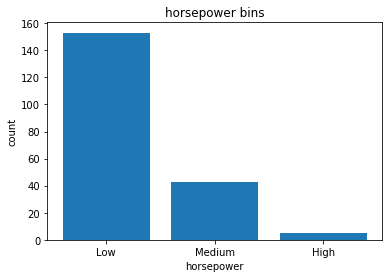

In [171]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())
#pyplot.hist(df["horsepower-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
    Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High"). 
</p>
<p>
    We successfully narrow the intervals from 59 to 3!
</p>

<h3>Bins visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 

Text(0.5, 1.0, 'horsepower bins')

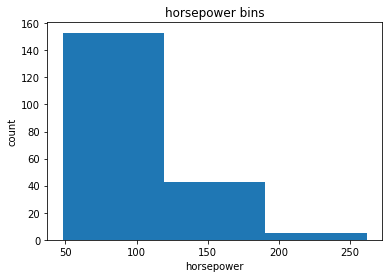

In [172]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for attribute "horsepower". 

<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    So we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [173]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highyway-L/100km',
       'horsepower-binned'],
      dtype='object')

get indicator variables and assign it to data frame "dummy_variable_1" 

In [174]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


change column names for clarity 

In [178]:
dummy_variable_1.rename(columns={'gas':'fuel-type-octane', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head(100)
#dummy_variable_1['fuel-type-octane'].unique()

,fuel-type-diesel,fuel-type-octane
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
95,0,1
96,0,1
97,0,1
98,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset. 

In [180]:
# merge data frame "df" and "dummy_variable_1" 
#df = pd.concat([df, dummy_variable_1], axis=1)
#df.tail(10)
# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highyway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-octane
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


In [181]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highyway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-octane
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>As above, create indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1.</b>
</div>

In [182]:
# Write your code below and press Shift+Enter to execute 
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Double-click <b>here</b> for the solution.

<!-- The answer is below:

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

-->

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe then drop the column 'aspiration'</b>
</div>

In [183]:
# Write your code below and press Shift+Enter to execute 
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)
df.head(10)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highyway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-octane,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0
5,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,19,25,15250.0,12.368421,9.400000,Low,0,1,1,0
6,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,19,25,17710.0,12.368421,9.400000,Low,0,1,1,0
7,1,122,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,...,19,25,18920.0,12.368421,9.400000,Low,0,1,1,0
8,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,...,17,20,23875.0,13.823529,11.750000,Medium,0,1,0,1
9,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,0.900000,...,23,29,16430.0,10.217391,8.103448,Low,0,1,1,0


Double-click <b>here</b> for the solution.

<!-- The answer is below:

#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

-->

save the new csv 

In [184]:
df.to_csv('clean_df.csv')

<h1>Thank you for completing this notebook</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">

    <p><a href="https://cocl.us/corsera_da0101en_notebook_bottom"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/BottomAd.png" width="750" align="center"></a></p>
</div>

<h3>About the Authors:</h3>

This notebook was written by <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan and <a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a> and <a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a> is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.</p>

<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/">MIT License</a>.</p>